In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm
import math 
import qutip as qt
from scipy.optimize import curve_fit

from scipy.stats import norm

import scipy.integrate as integrate

from scipy.signal import argrelextrema #Til opgave 2a
import seaborn

# local imports
from simulate_von_neumann import *

# set theme
seaborn.set_style('ticks')


seaborn.set(font_scale=1.25)

%reload_ext autoreload 
%autoreload 2

**To do:** 
- Detection error and measurement error are fractions and needs to sum to one or less right now!!! Perhaps we need to change it. 
- Decide finally on a measurement and error rate(!)

In [50]:
#Constant for all simulations in this experiment
#Simulation parameters
N_sim = 1000
N = 100
delta_t = 1

#System / meter parameters:
a0 = 1/(np.sqrt(2))+0j
b0 = np.sqrt(1-abs(a0)**2)
sigma = 1
g = sigma/4
epsilon = [0,(2*np.pi*g)/(sigma*N*40)]

#detector and measurement success rates. 
rm = [1,0.99,0.99*0.5] #without measurement noise, with measurement noise
rd = [0,0.99*0.5] 
t_span = np.linspace(0,N*delta_t-1,N)

In [57]:
# Simulation 1: Weak measurement
x1,a1,b1= Xeuler_sim(N_sim,N,g, epsilon[0], a0,b0,rm[0],rd[0])

# Simulation 2: Weak measurement with slow rabi oscilation
x2,a2,b2= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[0],rd[0])

# Simulation 3: Weak measurement with slow rabi oscilation, measurement error
#x3,a3,b3= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[1],rd[0])

# Simulation 4: Weak measurement with slow rabi oscilation, equal measurement and detection error
#x3,a3,b3= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[2],rd[1])


[autoreload of simulate_von_neumann failed: Traceback (most recent call last):
  File "c:\Users\kts661\AppData\Local\miniconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\kts661\AppData\Local\miniconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\kts661\AppData\Local\miniconda3\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "c:\Users\kts661\Documents\GitHub\quantum-sensing\simulate_von_neumann.

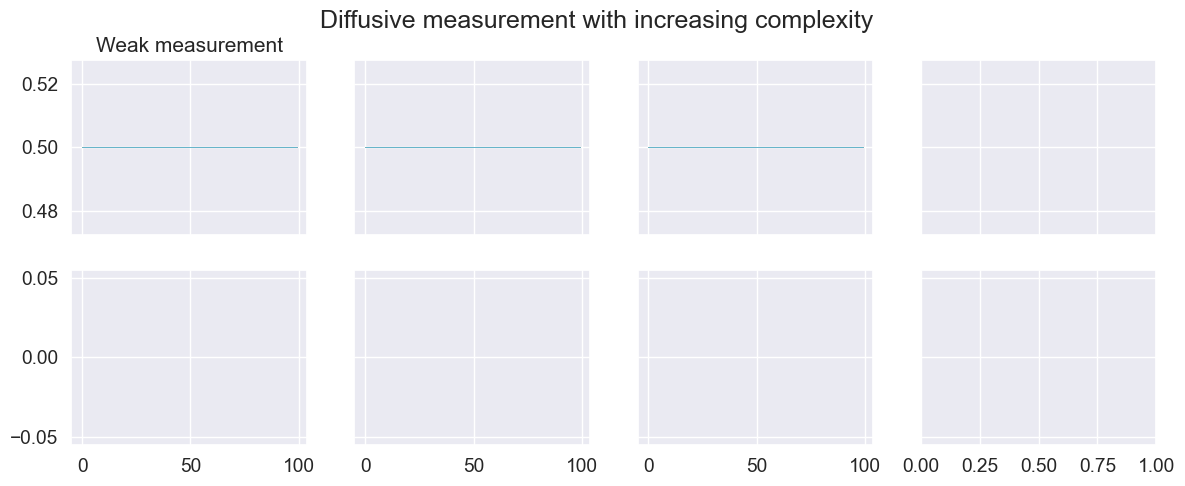

In [56]:
fig, ax = plt.subplots(2,4,figsize=(14,5),sharex='col', sharey='row')

fig.suptitle('Diffusive measurement with increasing complexity')

for i in range(N):
    #Simulation 1
    ax[0,0].set_title('Weak measurement')
    ax[0,0].plot(t_span,abs(a1[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,0].plot(x1[i]['t'],x1[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    #Simulation 2
    ax[0,1].plot(t_span,abs(a2[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,1].plot(x2[i]['t'],x2[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    #Simulation 3
    ax[0,2].plot(t_span,abs(a3[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,2].plot(x3[i]['t'],x3[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')